# Chapter 61: Support Vector Machines

### This code generates figures 3, 4, and 7 in Chapter 61: Support Vector Machines (vol. III)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy
4. tqdm

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm

## Example 61.1 (Binary classification using soft-SVM)

We show in Fig. 61.3 a collection of $150$ feature samples $h_n\in\mathbb{R}^{2}$ whose classes $\pm 1$ are known beforehand: 120 samples are selected for training and 30 samples are selected for testing. The data arises from the dimensionally reduced iris dataset from Example 57.4; we denoted the two-dimensional reduced feature vectors by the notation $h_n'$ in that example. We denote them by $h_n$ here. We employ the two classes shown in the bottom plot of Fig. 57.5 and denote them by $\gamma(n)\in\{\pm 1\}$. We will use the data to compare the performance of the perceptron and SVM algorithms.

In [20]:
# Applying to IRIS data, with feature dimension reduced to 2 by PCA
# and features centered and variance normalized

print("IRIS DATA...")

# Linearly separable data
data_feature_reduced = scipy.io.loadmat("data/iris_data_feature_dimension_reduced_two_labels.mat") # loads normalized Iris features reduced to dimension 2x1
C2 = data_feature_reduced["labelsz"] # this column contains the label variables gamma; +1 and -1
Az = data_feature_reduced["Az"] 
A2 = np.concatenate([Az, C2], axis=-1) # each row contains 2 attributes followed by +-1 label

print("     ")
print("RUNNING PERCEPTRON")

# Running PERCEPTRON
N = max(A2.shape) # total number of data points
N_test = round(0.2*N) # number of test data separated for testing (20%)
A2_test = A2[N-N_test:N]
A2_train = A2[:N-N_test]
C2_test = A2_test[:, -1]
C2_train = A2_train[:, -1]
N_train = max(A2_train.shape)

mu = 1

number_of_passes = 20 # number of passes over data
w = np.zeros(3) # we extend w from two dimensions to three; its leading entry is interpreted as -theta
for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    for n in range(N_train):
        h = np.concatenate([np.ones(1), A2_train[P[n], :2]]) # feature vector (it is a row here and extended by adding one)
        gamma = A2_train[P[n], 2] # its class
        gamma_hat = h@w 
        if gamma*gamma_hat <= 0:
            w += mu*gamma*h 

# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
z = np.arange(-4, 4, 0.1)
h2 = z 
h3 = (-w[0] - h2*w[1])/w[2] # used to plot the separating line

wstar = w.copy()
error = 0
for n in range(N_test):
    h = np.concatenate([np.ones(1), A2_test[n, :2]]) # feature vector
    gamma = A2_test[n, 2] # its class
    gamma_hat = h@wstar 
    if gamma*gamma_hat <= 0:
        error += 1

print("Perceptron wstar: ", wstar)
print("Empirical error rate for Perceptron on test data (%): ", (error/N_test)*100)

print("RUNNING SOFT-MARGIN SVM WITH L2-REGULARIZATION")
# Running SOFT-MARGIN SVM
rho = 0.01
mu = 0.1

number_of_passes = 5 # number of passes over data
w = np.zeros(2)
theta = 0
for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    for n in range(N_train):
        h = A2_train[P[n], :2] # feature vector (it is a row here)
        gamma = A2_train[P[n], 2] # its class
        gamma_hat = h@w - theta 
        if gamma*gamma_hat <= 1:
            theta = theta - mu*gamma 
            w = (1-mu*rho)*w + mu*gamma*h
        else:
            theta = theta 
            w = (1-mu*rho)*w 


wstarx = np.array([-theta, w[0], w[1]])

# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
z = np.arange(-4, 4, 0.1)
h2x = z 
h3x = (-wstarx[0] - h2x*wstarx[1])/wstarx[2] # used to plot the separating line

error = 0
for n in range(N_test):
    h = np.concatenate([np.ones(1), A2_test[n, :2]])
    gamma = A2_test[n, 2] # its class
    gamma_hat = h@wstarx 
    if gamma*gamma_hat <= 0:
        error += 1

print("Soft-SVM w: ", wstarx)
print("Empirical error rate for soft-margin SVM on test data (%): ", (error/N_test)*100)

Z_0 = (A2_train[np.argwhere(C2_train.reshape(-1) == -1)]).reshape(-1, 3)
Z_1 = (A2_train[np.argwhere(C2_train.reshape(-1) == 1)]).reshape(-1, 3)

Z_0_test = (A2_test[np.argwhere(C2_test.reshape(-1) == -1)]).reshape(-1, 3)
Z_1_test = (A2_test[np.argwhere(C2_test.reshape(-1) == 1)]).reshape(-1, 3)

IRIS DATA...
     
RUNNING PERCEPTRON
Perceptron wstar:  [-1.          0.9231298   0.03022955]
Empirical error rate for Perceptron on test data (%):  0.0
RUNNING SOFT-MARGIN SVM WITH L2-REGULARIZATION
Soft-SVM w:  [-1.          1.36705173 -0.21397148]
Empirical error rate for soft-margin SVM on test data (%):  0.0


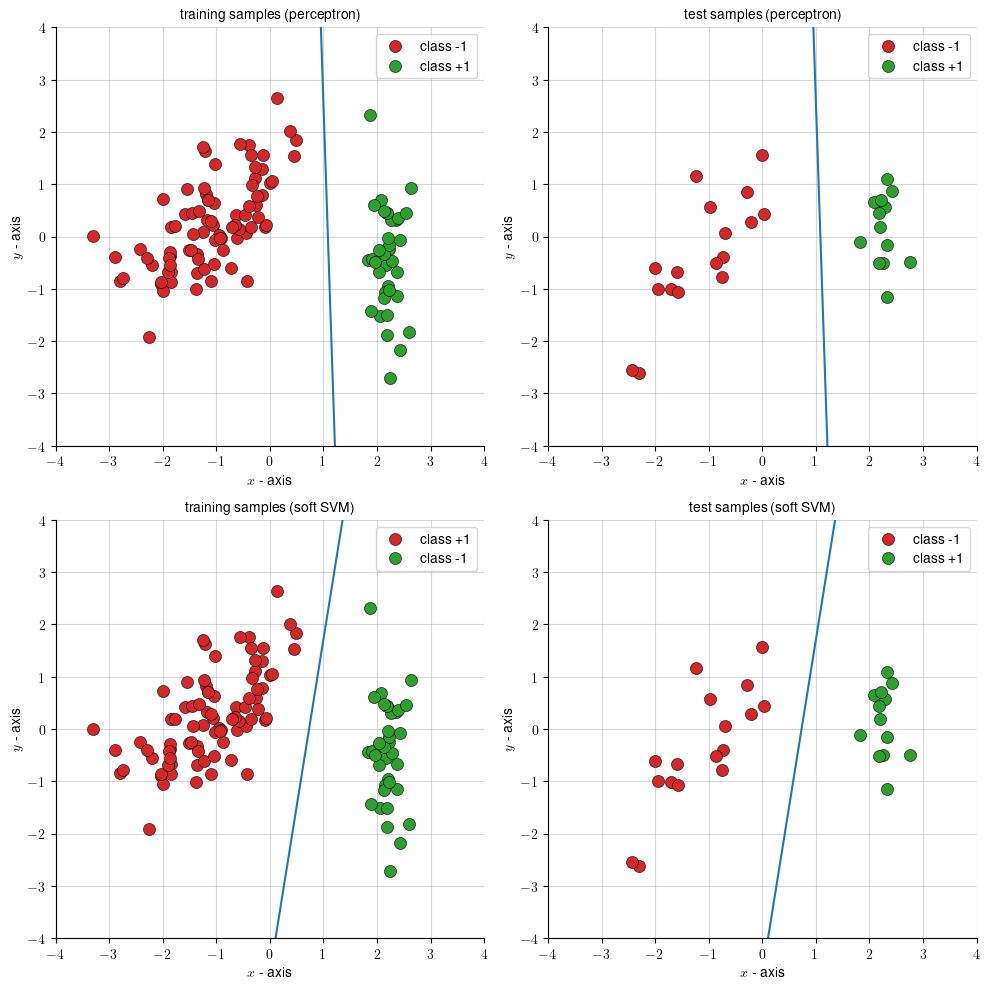

In [23]:
# figure 3 (Perceptron and SVM)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.plot(h2, h3)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training samples (perceptron)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(Z_0_test[:, 0], Z_0_test[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(Z_1_test[:, 0], Z_1_test[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.plot(h2, h3)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test samples (perceptron)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.plot(h2x, h3x)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training samples (soft SVM)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(224)
ax.scatter(Z_0_test[:, 0], Z_0_test[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1")
ax.scatter(Z_1_test[:, 0], Z_1_test[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.plot(h2x, h3x)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test samples (soft SVM)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-3.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 61.3** The first row shows the training and test data for the perceptron algorithm without regularization and $\mu=1$, while the second row shows the same data for the soft-margin SVM algorithm under $\ell_2$ -regularization with $\rho=0.01$ and $\mu=0.1$. The lines show the resulting classifiers. 

We first use the data to train the perceptron classifier (60.26), under extensions (60.20),  by running five passes over the training data: 

$$
\begin{align*} &
\widehat{\gamma}(n) = h_n^T w_{n-1} \tag{61.23a} \\ &
w_n= w_{n-1} \;+\; {\gamma}(n)h_n,\;\;\;\;\;\textnormal{if}\;\; {\gamma}(n)  \widehat{\gamma}(n)
\leq 0\; \tag{61.23b}
\end{align*}
$$

During each pass, the data $\{{\gamma}(n),h_n\}$ is randomly reshuffled and the algorithm is re-run over the data starting from the weight iterate obtained at the end of the previous pass. The line in the figure shows the separating curve obtained in this manner with parameters (where we now undo the extension (60.20)):

$$
w^{\star}=\begin{bmatrix}   3.4184\\
-1.5104\end{bmatrix},\;\;\;\;\theta^{\star} = 1.0\;\;\;\;(\textnormal{perceptron}) \tag{61.24}
$$

It is seen that the separation curve is able to classify all test vectors and leads to $0\%$ empirical error rate.

We also use the same data to run five passes of the soft-SVM classifier (61.22) by using $\rho=0.01$ and $\mu=0.1$. The data is randomly reshuffled at the start of each pass. The line in the figure shows the separating curve obtained in this manner with parameters

$$
w^{\star}=\begin{bmatrix}   1.2253\\
-0.3855\end{bmatrix},\;\;\;\;\theta^{\star} = 1.0\;\;\;\;(\textnormal{soft SVM}) \tag{61.25}
$$

It is also seen that the separation curve is able to classify all test vectors and leads to $0\%$ empirical error rate.

## Example 61.2 (Application to breast cancer dataset)

We  apply the soft-SVM classifier (61.22)  to the breast cancer dataset encountered earlier in Example 53.3. The data
consists of $N=569$ samples, with each sample corresponding to a benign or malignant cancer classification. We use $\gamma(n)=-1$ for benign samples and $\gamma(n)=+1$ for malignant samples. Each feature vector in the data contains $M=30$ attributes corresponding to measurements extracted from a digitized image of a 
fine needle aspirate (FNA) of a breast mass. The attributes describe characteristics of the cell nuclei present in the image; examples of these attributes were listed earlier in  
Table 53.1.
 
All feature vectors are centered around the sample mean and their variances scaled to 1 according to the preprocessing step described earlier under principal component analysis (PCA) in (57.6).  We select $456$ samples ($80\%$) randomly from these processed vectors for training and keep the remaining 
$113$ samples ($20\%$) for testing. We use $\rho=0.01$ and $\mu=0.01$. We run the algorithm $20$ passes over the training data using random reshuffling. The resulting empirical error rate on the test data is $12.39\%$, resulting from 14 misclassified samples out of $113$ test samples.
 
 
For comparison purposes, we use the PCA procedure (57.34) to reduce the dimension of the feature space down to $M=2$ and run again the same soft-SVM procedure over this reduced data. Figure 61.4 shows the $456$ training samples and $113$ test samples, along with the resulting classifier whose parameters are determined to be
 
$$
w^{\star}=\begin{bmatrix}   -1.1022\\
0.6507\end{bmatrix},\;\;\;\;\theta^{\star} = -0.07\;\;\;\;(\textnormal{soft SVM}) \tag{61.26}
$$

The resulting empirical error on the test data is found to be $5.31\%$, which amounts to 6 misclassified decisions out of 113 test samples.

In [60]:
# Applying soft-SVM to full-dimension Breast Cancer data, with features
# centered and variance-normalized

print("BREAST CANCER DATA...")
data = scipy.io.loadmat("data/wdbc.mat") # open file 
features = data["x"] # each row is a feature vector with 30 attributes
labels = data["t"] # each entry +1 (malignant) or -1 (benign)
N = max(labels.shape) # 569 samples
M = min(features.shape) # 30 attributes per feature vector

C3 = labels # this column contains the label variables gamma; +1 and -1
A3 = np.concatenate([features, labels], axis=0).T # each row contains 30 attributes followed by +-1 label

print("RUNNING SOFT-MARGIN SVM WITH L2-REGULARIZATION")
# Running SOFT-MARGIN SVM
N_test = round(0.2*N) # number of test data separated for testing (20%)
A3_test = A3[N-N_test:N]
A3_train = A3[:N-N_test]
N_train = max(A3_train.shape)
rho = 0.01
mu = 0.01

number_of_passes = 20 # number of passes over data
w = np.zeros(M)
theta = 0 
for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    h = A3_train[P[n], :M] # feature vector (it is a row here and extended by adding one)
    gamma = A3_train[P[n], M] # its class
    gamma_hat = h@w - theta 
    if gamma*gamma_hat <= 1:
        theta = theta - mu*gamma 
        w = (1-mu*rho)*w + mu*gamma*h 
    else:
        theta = theta 
        w = (1-mu*rho)*w 

wstar = np.concatenate([-theta*np.ones(1), w])
error = 0
for n in range(N_test):
    h = np.concatenate([np.ones(1), A3_test[n, :M]]) # feature vector
    gamma = A3_test[n, M] # its class
    gamma_hat = h@wstar
    if gamma*gamma_hat <= 0:
        error += 1

print("Empirical error rate for soft-margin SVM on test data: ", (error/N_test)*100)

print("Extended wstar with -theta on top: ", wstar)

# Repeating on dimensionally-reduced breast cancer data
print("BREAST CANCER DATA in TWO DIMENSIONS....")

breast_cancer_data = scipy.io.loadmat("data/breast_cancer_data_feature_dimension_2.mat") # open file
features = breast_cancer_data["A2"] # each row is a reduced feature vector with 2 attributes
labels = breast_cancer_data["labels2"] # each entry +1 (malignant) or -1 (benign)
N = max(labels.shape) # 569 samples
M = min(features.shape) # 2 attributes per feature vector

C4 = labels # this columns contains the label variables gamma; +1 and -1
A4 = np.concatenate([features, labels], axis=-1) # each row contains 2 attributes followed by +-1 label

print("RUNNING SOFT-MARGIN SVM WITH L2-REGULARIZATION")

# Running SOFT-MARGIN SVM
N_test = round(0.2*N) # number of test data separated for testing (20%)
A4_test = A4[N-N_test:N]
A4_train = A4[:N-N_test]
C4_test = A4_test[:, -1]
C4_train = A4_train[:, -1]
N_train = max(A4_train.shape)
rho = 0.01
mu = 0.01

number_of_passes = 20 # number of passes over data
w = np.zeros(M)
theta = 0 
for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    h = A4_train[P[n], :M] # feature vector (it is a row here and extended by adding one)
    gamma = A4_train[P[n], M] # its class
    gamma_hat = h@w - theta 
    if gamma*gamma_hat <= 1:
        theta = theta - mu*gamma 
        w = (1-mu*rho)*w + mu*gamma*h 
    else:
        theta = theta 
        w = (1-mu*rho)*w 

wstar = np.concatenate([-theta*np.ones(1), w])
error = 0
for n in range(N_test):
    h = np.concatenate([np.ones(1), A4_train[n, :M]]) # feature vector
    gamma = A4_train[n, M] # its class
    gamma_hat = h@wstar
    if gamma*gamma_hat <= 0:
        error += 1

print("Empirical error rate for soft-margin SVM on test data: ", (error/N_test)*100)

print("Extended wstar with -theta on top: ", wstar)

# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
z = np.arange(-20, 10, 0.1)
h2y = z 
h3y = (-wstar[0] - h2y*wstar[1])/wstar[2] # used to plot the separating line

Z_0 = (A4_train[np.argwhere(C4_train.reshape(-1) == -1)]).reshape(-1, 3)
Z_1 = (A4_train[np.argwhere(C4_train.reshape(-1) == 1)]).reshape(-1, 3)

Z_0_test = (A4_test[np.argwhere(C4_test.reshape(-1) == -1)]).reshape(-1, 3)
Z_1_test = (A4_test[np.argwhere(C4_test.reshape(-1) == 1)]).reshape(-1, 3)

BREAST CANCER DATA...
RUNNING SOFT-MARGIN SVM WITH L2-REGULARIZATION
Empirical error rate for soft-margin SVM on test data:  22.807017543859647
Extended wstar with -theta on top:  [-4.00000000e-02 -3.62440971e-01 -6.43396607e-01 -2.27298433e+00
 -6.76032601e+00 -2.99080336e-03 -2.31619193e-03 -3.05202692e-04
  1.81974104e-04 -6.79835757e-03 -2.64666169e-03 -1.06716499e-02
 -5.90939537e-02 -6.18305579e-02 -1.26058300e-01 -4.09761376e-04
 -2.07622959e-03 -2.17521021e-03 -6.46977130e-04 -1.11496552e-03
 -3.37921720e-04 -3.33579553e-01 -6.84976174e-01 -2.00113400e+00
  2.09187934e+00 -3.25943182e-03 -2.11009889e-03  3.38684977e-03
  5.71664345e-04 -6.93106732e-03 -2.99600099e-03]
BREAST CANCER DATA in TWO DIMENSIONS....
RUNNING SOFT-MARGIN SVM WITH L2-REGULARIZATION
Empirical error rate for soft-margin SVM on test data:  6.140350877192982
Extended wstar with -theta on top:  [-0.06       -0.31347527  0.1849393 ]


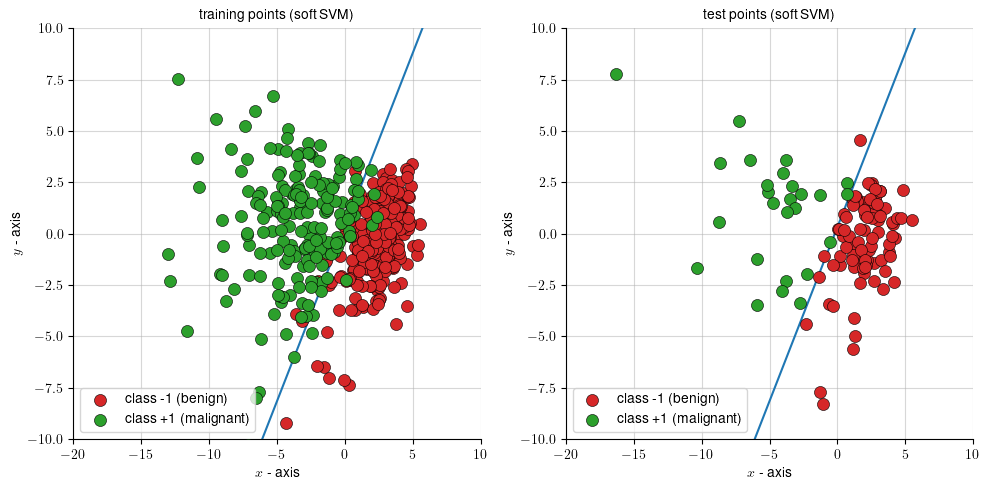

In [64]:
# figure 4 (soft-SVM; breast cancer dataset)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 5
fig = plt.figure()

ax = fig.add_subplot(121)
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1 (benign)")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1 (malignant)")
ax.plot(h2y, h3y)
ax.set_xlim([-20, 10])
ax.set_ylim([-10, 10])
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training points (soft SVM)", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(122)
ax.scatter(Z_0_test[:, 0], Z_0_test[:, 1], zorder=3, c="tab:red", edgecolor="black", linewidth=0.4, s=75, label="class -1 (benign)")
ax.scatter(Z_1_test[:, 0], Z_1_test[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1 (malignant)")
ax.plot(h2y, h3y)
ax.set_xlim([-20, 10])
ax.set_ylim([-10, 10])
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test points (soft SVM)", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-4.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 61.4** The plots show the training and test samples for two-dimensional reduced feature vectors from a breast cancer dataset, along with the separating line that arises from training a soft-SVM classifier.

## Example 61.5 (Selecting the regularization parameter)

We apply the cross validation procedure to the selection of the regularization parameter $\rho$ and the step-size parameter $\mu$ in an $\ell_2$ -regularized logistic regression implementation. We consider the same data from Example 59.2, except that we now examine the problem of separating class $r=1$ from class $r=2$. There are a total of $N_{\textnormal{TOTAL}}=100$ samples, with 50 samples from each class. We separate $T=20$ samples for testing (that is $20\%$ of the total number of samples) and use the remaining $N=80$ samples for training. We extend the feature vectors according to (59.16) and apply 100 passes of the $\ell_2$ -regularized logistic regression algorithm (59.15). 

In [109]:
data = scipy.io.loadmat("data/iris_data_feature_dimension_reduced.mat") # loads normalized Iris features reduced to dimension 2x1, classes 0, 1, 2
labels = data["labels2"] # this column contains the label variables: 0, 1, 2
features = data["A2"].squeeze() # feature vectors in row form of size 2x1 each
Nt = 150



B4 = []

m = 1 # separating training data from classes 1 and 2 (these are hardly linearly separable)
for n in range(Nt):
    if labels[n] == 1:
        B4.append(np.concatenate([features[n], np.ones(1)]))
    elif labels[n] == 2:
        B4.append(np.concatenate([features[n], -np.ones(1)]))

B4 = np.array(B4)

N = max(B4.shape)
M = min(B4.shape) - 1

P = np.random.permutation(N)
B4X = np.zeros((N, M+1))
for n in range(N): # random reshuffling to mix the data
    B4X[n] = B4[P[n]]

B4 = B4X.copy()
C4 = B4[:, 2]

# preparing data for plotting
Z_0 = (B4[np.argwhere(C4.reshape(-1) == -1)]).reshape(-1, 3)[:, :-1]
Z_1 = (B4[np.argwhere(C4.reshape(-1) == 1)]).reshape(-1, 3)[:, :-1]

# cross validation of regularization parameter
rho_vec = np.arange(20) # varying the regularization parameter
Lrho = max(rho_vec.shape)
N_test = round(.2*N) # number of test data separated for testing (20%) 
B4_test_x = B4[N-N_test:N]
B4_train_x = B4[:N-N_test]
N_train_x = max(B4_train_x.shape)

Kseg = 10 # number of segments for cross-validation
N_seg = int(N_train_x/Kseg)
N_train = int((Kseg-1)*N_seg)
N_test = N_seg

mu = 0.01
num_error = np.zeros((Kseg, Lrho))
error_rho_final = np.zeros(Lrho)

for nrho in tqdm(range(Lrho)):
    B4_train = np.zeros((N_train, M+1))
    B4_test = np.zeros((N_test, M+1))
    for kkx in range(Kseg):
        if kkx == 0:
            B4_train[:N_train] = B4_train_x[N_seg:N_train_x]
            B4_test[:N_test] = B4_train_x[:N_seg]
        
        if kkx == Kseg-1:
            B4_train[:N_train] = B4_train_x[:(Kseg-1)*N_seg]
            B4_test[:N_test] = B4_train_x[(Kseg-1)*N_seg:N_train_x]

        if (kkx > 0) and (kkx < Kseg-1):
            A1 = B4_train_x[:(kkx)*N_seg]
            A2 = B4_train_x[(kkx+1)*N_seg:N_train_x]
            B4_train = np.concatenate([A1, A2])
            B4_test = B4_train_x[kkx*N_seg:(kkx+1)*N_seg]

        rho = rho_vec[nrho]
        time = 0
        number_of_passes = 100 # number of passes over data
        w = np.zeros(M+1)
        for p in range(number_of_passes):
            P = np.random.permutation(N_train)
            for n in range(N_train):
                h = np.concatenate([np.ones(1), B4_train[P[n], :M]])
                gamma = B4_train[P[n], M] # its class
                gamma_hat = h@w 
                s = 1 + np.exp(gamma*gamma_hat)
                w = (1-mu*rho)*w + mu*gamma*h*(1/s)
        
        error = 0

        for n in range(N_test):
            h = np.concatenate([np.ones(1), B4_test[n, :M]])
            gamma = B4_test[n, M] # its class
            gamma_hat = h@w 
            if gamma*gamma_hat <= 0:
                error += 1
        num_error[kkx, nrho] = error/N_test 
    error_rho_final[nrho] = num_error[:, nrho].mean()

100%|██████████| 20/20 [00:24<00:00,  1.20s/it]


In [110]:
# cross validation of step-size
rho = 5
mu_vec = np.arange(0.001, 0.1, 0.005) # varying regularization parameter
Lrho = max(mu_vec.shape)
N_test = round(0.2*N) # number of test data separated for testing (20%)
B4_test_x = B4[N-N_test:N]
B4_train_x = B4[:N-N_test]
N_train_x = max(B4_train_x.shape)

N_test = N_seg 
num_error = np.zeros((Kseg, Lrho))
error_mu_final = np.zeros(Lrho)

for nrho in tqdm(range(Lrho)):
    B4_train = np.zeros((N_train, M+1))
    B4_test = np.zeros((N_test, M+1))
    for kkx in range(Kseg):
        if kkx == 0:
            B4_train[:N_train] = B4_train_x[N_seg:N_train_x]
            B4_test[:N_test] = B4_train_x[:N_seg]
        
        if kkx == Kseg-1:
            B4_train[:N_train] = B4_train_x[:(Kseg-1)*N_seg]
            B4_test[:N_test] = B4_train_x[(Kseg-1)*N_seg:N_train_x]

        if (kkx > 0) and (kkx < Kseg-1):
            A1 = B4_train_x[:(kkx)*N_seg]
            A2 = B4_train_x[(kkx+1)*N_seg:N_train_x]
            B4_train = np.concatenate([A1, A2])
            B4_test = B4_train_x[kkx*N_seg:(kkx+1)*N_seg]

        mu = mu_vec[nrho]
        time = 0
        number_of_passes = 100 # number of passes over data
        w = np.zeros(M+1)
        for p in range(number_of_passes):
            P = np.random.permutation(N_train)
            for n in range(N_train):
                h = np.concatenate([np.ones(1), B4_train[P[n], :M]])
                gamma = B4_train[P[n], M] # its class
                gamma_hat = h@w 
                s = 1 + np.exp(gamma*gamma_hat)
                w = (1-mu*rho)*w + mu*gamma*h*(1/s)
        
        error = 0

        for n in range(N_test):
            h = np.concatenate([np.ones(1), B4_test[n, :M]])
            gamma = B4_test[n, M] # its class
            gamma_hat = h@w 
            if gamma*gamma_hat <= 0:
                error += 1
        num_error[kkx, nrho] = error/N_test 
    error_mu_final[nrho] = num_error[:, nrho].mean()

100%|██████████| 20/20 [00:21<00:00,  1.05s/it]


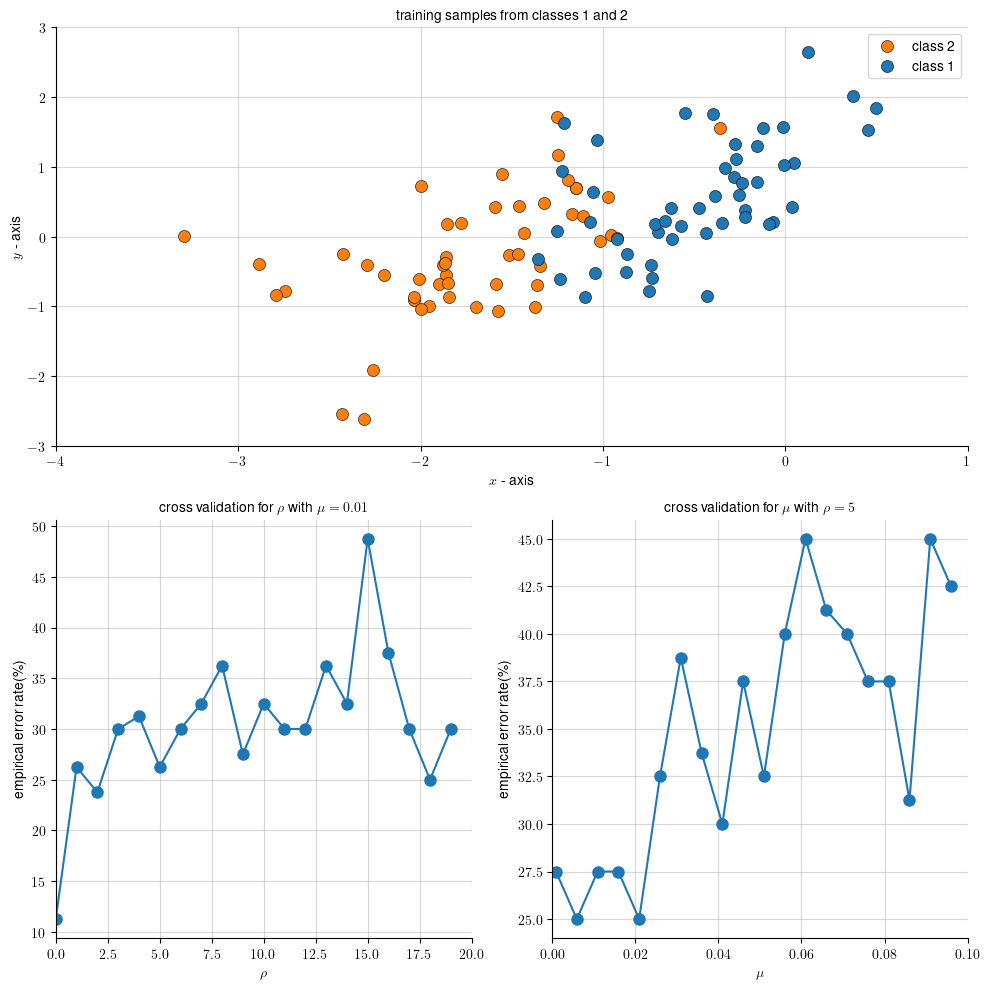

In [117]:
#figG-chX10
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(2, 2, (1, 2))
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 2")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 1")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training samples from classes 1 and 2", fontsize=10)
ax.set_ylim([-3, 3])
ax.set_xlim([-4, 1])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(2, 2, 3)
ax.plot(rho_vec, 100*error_rho_final, "-o", markersize=8)
ax.set_xlabel("$\\rho$", fontsize=10)
ax.set_ylabel("empirical error rate(\%)", fontsize=10)
ax.set_title("cross validation for $\\rho$ with $\mu=0.01$", fontsize=10)
ax.set_xlim([0, 20])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(2, 2, 4)
ax.plot(mu_vec, 100*error_mu_final, "-o", markersize=8)
ax.set_xlabel("$\mu$", fontsize=10)
ax.set_ylabel("empirical error rate(\%)", fontsize=10)
ax.set_title("cross validation for $\mu$ with $\\rho=5$", fontsize=10)
ax.set_xlim([0, 0.1])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.savefig("figs/fig-7.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 61.7** The plot on the left shows how the empirical error rate for the $\ell_2$ -regularized logistic regression algorithm  varies with the selection of  $\rho$. A $10-$fold cross-validation implementation is used to generate this curve. The plot on the right shows the same curve as a function of the step-size parameter.

We generate two plots for the empirical error rate of the logistic learner. In one case, we fix the step-size parameter at $\mu=0.01$ and vary the regularization parameter $\rho$ in steps of one in the range $\rho\in[0,20]$. In the second case, we fix the regularization parameter at $\rho=5$ and vary the step-size $\mu$ in steps of $0.005$ in the range $\mu\in [0.001,0.1]$. We implement a $10-$fold cross validation scheme. That is, we set $K=10$ and divide the training data into $10$ segments of $8$ samples each. We fix $\rho$ at a particular value, and  run the logistic regression on 9  segments while keeping the 10th segment for testing; this 10th segment generates an empirical error value. While running the algorithm on the 9 segments we run it multiple times over the data using $100$ passes. We repeat this procedure $10$ times, using 9 segments for training and 1 segment for testing, and subsequently average the empirical errors to determine the error rate that corresponds to the fixed value of $\rho$. We repeat the construction for other values of $\rho$ and arrive at the curve shown on the left in Fig. 61.7. From this figure, it is evident that smaller values of $\rho$ are preferred. 
 
 
We repeat the same construction for the step-size parameter. We fix $\mu$ at one particular value, and  run (59.15) on 9 of the segments while keeping the 10th segment for testing; this 10th segment generates an empirical error value. While running the algorithm on the 9 segments we run it multiple times over the data using $100$ passes. We repeat the procedure $10$ times, using 9 segments for training and 1 segment for testing, and subsequently average the empirical errors to determine the error rate that corresponds to the fixed value of $\mu$. We repeat the construction for other values of $\mu$ and arrive at the curve shown on the right in  Fig. 61.7. 